# Problem Statement
- Task is to predict the delivery time for the food orders from various parts of the city, from multiple restraurants along with multiple delivery partners.
- Their aim is to keep the business partners well informed of the delivery times to better plan their resources and help customers to better plan their meals.

In [ ]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
from datetime import datetime

# Random Forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Import Tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# For Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
df = pd.read_csv('delivery_time_dataset.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
# Chesking the shape of the data
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 197428
Number of columns : 14


In [ ]:
# Checking general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
# Summarizing the data
df.describe()

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
count,196441.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000
mean,2.978706,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065
std,1.524867,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830
min,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000
25%,2.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000
50%,3.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000
75%,4.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000
max,6.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000


In [ ]:
df.describe(include = ['O'])

,created_at,actual_delivery_time,store_id,store_primary_category
count,197428,197421,197428,192668
unique,180985,178110,6743,74
top,2015-02-11 19:50:43,2015-02-11 20:40:45,d43ab110ab2489d6b9b2caa394bf920f,american
freq,6,5,937,19399


- Data type for few columns needs change such as market_id, created_at and actual_delivery_time
- There are null values in multiple columns which need to be taken care of.
- Initial analysis of the mean and max values does show few instances of outliers in the data (outliers = mean +- (3*standard deviation)), which need to be taken care of.

# Data Preprocessing

### Null value treatment

In [ ]:
# Checking the count of null values
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

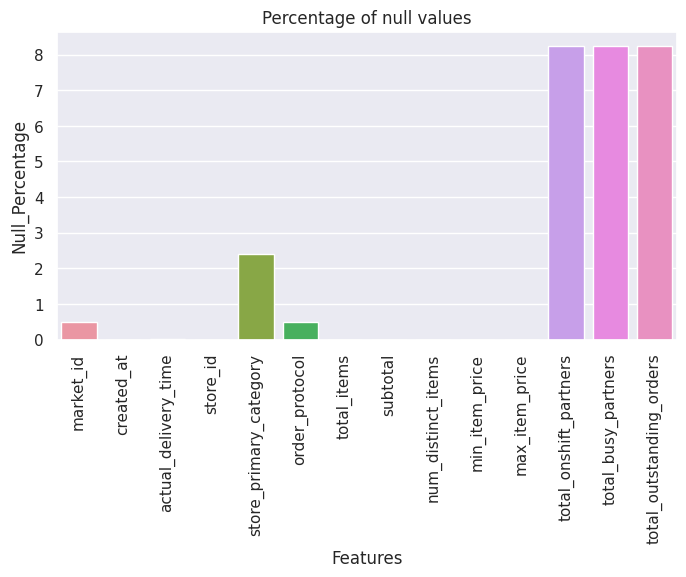

In [ ]:
# Checking percentage of null values in the data
df_null = df.isnull().sum()*100/len(df)
df_null = df_null.reset_index()
df_null.columns = ['Features','Null_Percentage']

# Plotting the data
plt.figure(figsize = (8,4))
sns.barplot(data = df_null, x = 'Features', y = 'Null_Percentage')
plt.title('Percentage of null values')
plt.xticks(rotation = 90)
plt.show()

- As the market_id, actual_delivery_time, store_primary_categiry and order_protocol columns are have null values less than 3% of data we will drop these values.
- For 'total_onshift_partners', 'total_busy_partners' and 'total_outstanding_orders' features we will input the data.

In [ ]:
df = df.dropna(subset = ['market_id','actual_delivery_time', 'store_primary_category','order_protocol'])
df.isnull().sum()

market_id                       0
created_at                      0
actual_delivery_time            0
store_id                        0
store_primary_category          0
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      15673
total_busy_partners         15673
total_outstanding_orders    15673
dtype: int64

In [ ]:
# Mean imputing rest of the null data

df['total_onshift_partners'].fillna(np.ceil(df['total_onshift_partners'].mean()), inplace = True)
df['total_busy_partners'].fillna(np.ceil(df['total_busy_partners'].mean()), inplace = True)
df['total_outstanding_orders'].fillna(np.ceil(df['total_outstanding_orders'].mean()), inplace = True)

In [ ]:
df.isnull().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [ ]:
# Assigning appropriate datatypes

df['market_id'] = df['market_id'].astype('int')
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

### Feature Engineering

In [ ]:
# Creating target column
df['Total_delivery_time'] = df['actual_delivery_time'] - df['created_at']
df['Total_delivery_time'] = df['Total_delivery_time'].apply(lambda x: x.total_seconds()//60)

In [ ]:
# Creating hour, day and weekday columns
df['hour_of_day'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.weekday
df['day'] = df['created_at'].dt.day

In [ ]:
# Creating weekday column
days = ["Monday", "Tuesday", "Wednesday",
        "Thursday", "Friday", "Saturday", "Sunday"]


df['Weekday'] = [days[x] for x in df['day_of_week']]

## Analysis

In [ ]:
# Segregating categorical and numerical variables
cat_cols = ['market_id','store_id','store_primary_category','order_protocol','hour_of_day','day_of_week','day']

num_cols = [x for x in df.columns if (df[x].dtype == 'int') or (df[x].dtype == 'float')]
num_cols = [x for x in num_cols if x not in cat_cols]

In [ ]:
cat_cols

['market_id',
 'store_id',
 'store_primary_category',
 'order_protocol',
 'hour_of_day',
 'day_of_week',
 'day']

In [ ]:
num_cols

['total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'Total_delivery_time']

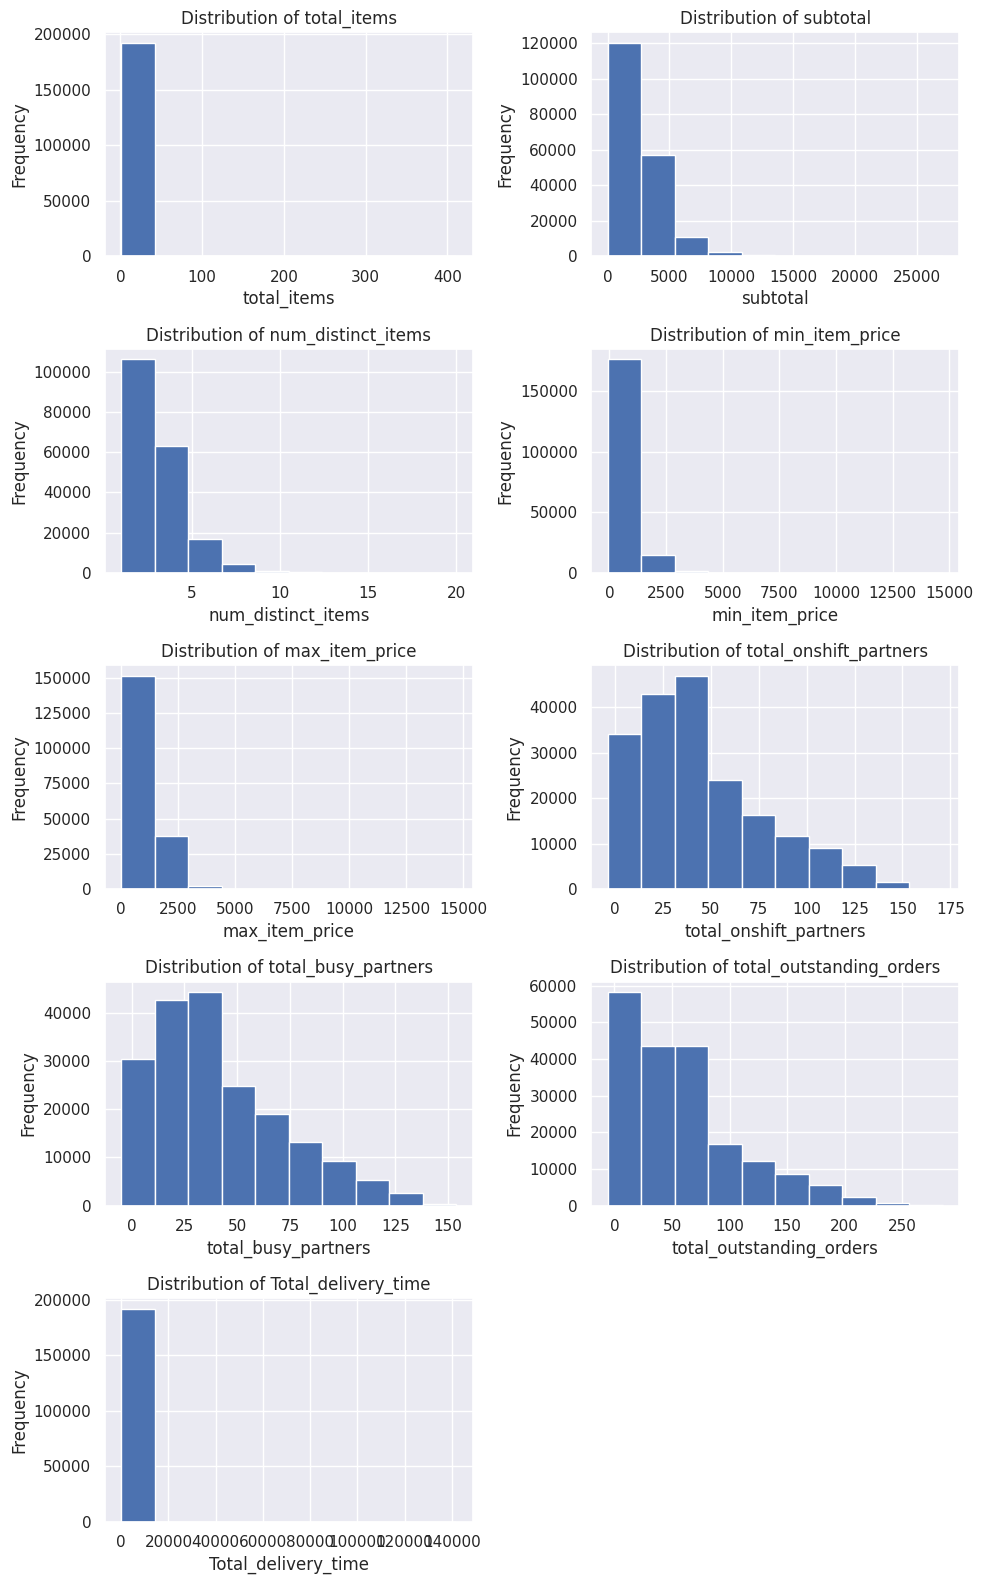

In [ ]:
# Checking the distribution of numerical columns to get an idea on how the data is distributed

plt.figure(figsize = (10, 16))

for i in range(1,len(num_cols)+1):
    rows = (len(num_cols)//2)+1
    plt.subplot(rows, 2, i)
    plt.hist(df[num_cols[i-1]])
    plt.title(f'Distribution of {num_cols[i-1]}')
    plt.xlabel(num_cols[i-1])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

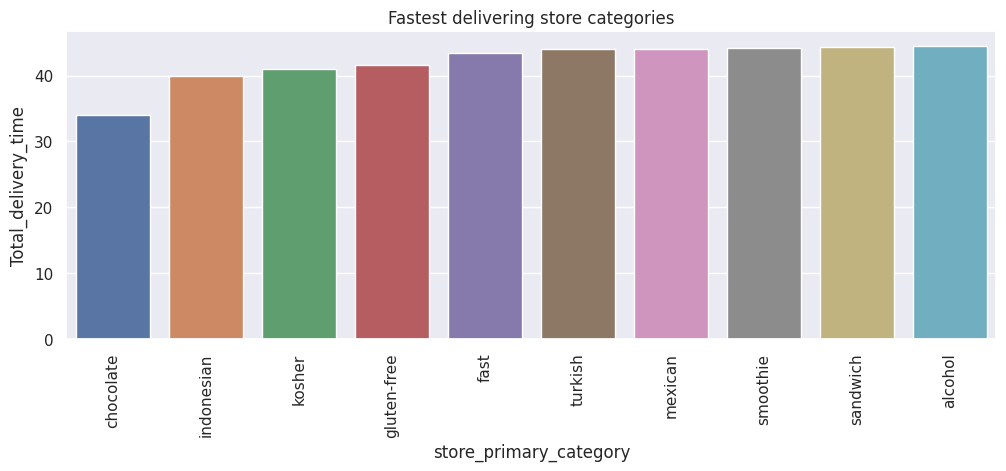

In [ ]:
# Store categories with hightest and lowest delivery times

# Fastest delivering store categories
df_cat_del_time = df.groupby('store_primary_category')['Total_delivery_time'].mean().reset_index().sort_values('Total_delivery_time')[:10]
df_cat_del_time.reset_index(drop = True)
df_cat_del_time

# Plot
plt.figure(figsize = (12,4))
sns.barplot(data = df_cat_del_time, x = 'store_primary_category', y = 'Total_delivery_time')
plt.xticks(rotation = 90)
plt.title('Fastest delivering store categories')
plt.show()

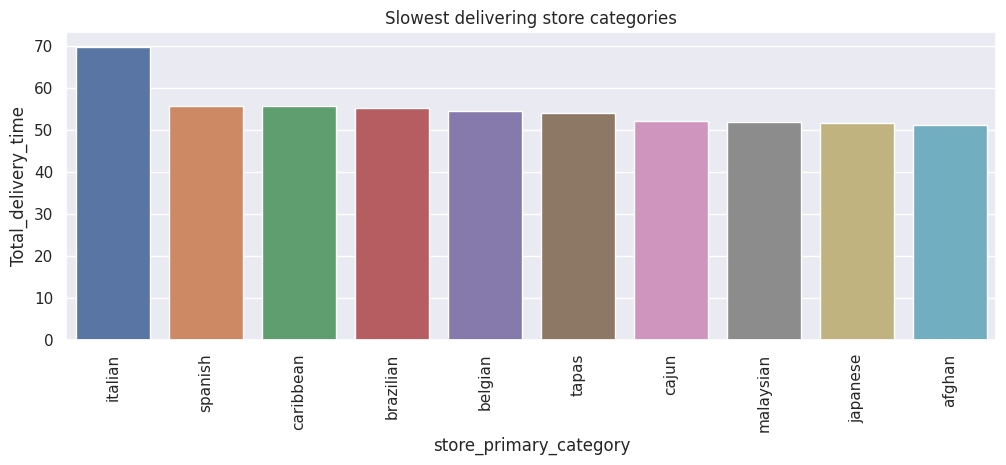

In [ ]:
# Store categories with hightest and lowest delivery times

# Slowest delivering store categories
df_slow_del_time = df.groupby('store_primary_category')['Total_delivery_time'].mean().reset_index().sort_values('Total_delivery_time', ascending = False)[:10]
df_slow_del_time.reset_index(drop = True)
df_slow_del_time

# Plot
plt.figure(figsize = (12,4))
sns.barplot(data = df_slow_del_time, x = 'store_primary_category', y = 'Total_delivery_time')
plt.xticks(rotation = 90)
plt.title('Slowest delivering store categories')
plt.show()

- Distribution of all the variables are right skewed, meaning as the numbers increase frequency decreases.
- Chocolates, Indonesian food, Kosher, Gluten-free are the fastest delivering store categories.
- While Italian, Spanish, Caribbean, Brazillian, etc. are some of the slowest delivering store categories.

### Outlier treatment

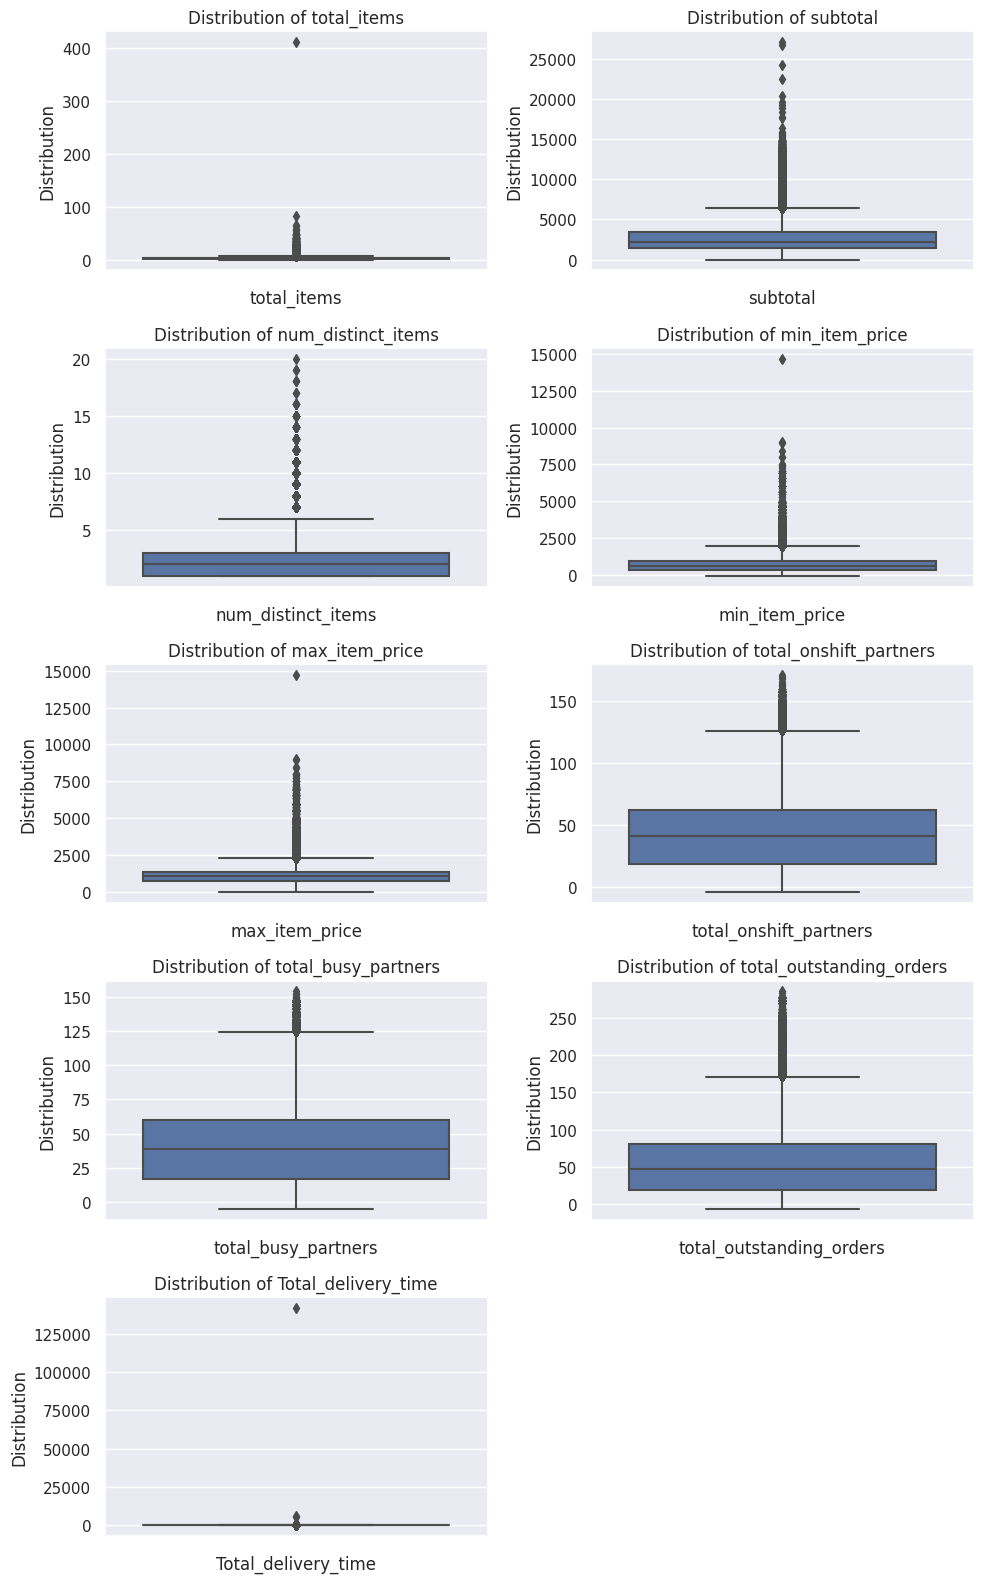

In [ ]:
# Checking for outliers
plt.figure(figsize = (10, 16))
for i in range(1,len(num_cols)+1):
    rows = (len(num_cols)//2)+1
    plt.subplot(rows, 2, i)
    sns.boxplot(data= df, y = num_cols[i-1])
    plt.title(f'Distribution of {num_cols[i-1]}')
    plt.xlabel(num_cols[i-1])
    plt.ylabel('Distribution')

plt.tight_layout()
plt.show()

In [ ]:
# The above plot shows almost all the features having outliers
# Checking percentage of Outliers for each field

for col in num_cols:
    q1 = np.quantile(df[col],0.25)
    q3 = np.quantile(df[col],0.75)
    IQR = q3-q1
    upper_wisker = q3 + (1.5 * IQR)
    lower_wisker = q1 - (1.5 * IQR)
    upper_outliers = len(df[df[col] > upper_wisker])
    lower_outliers = len(df[df[col] < lower_wisker])
    outlier_percentage = round((upper_outliers + lower_outliers)*100/len(df),2)

    print(f'Field = {col}')
    print(f'Total Outliers Count = {upper_outliers + lower_outliers}')
    print(f'Outlier percentage = {outlier_percentage}\n')

Field = total_items
Total Outliers Count = 9298
Outlier percentage = 4.84

Field = subtotal
Total Outliers Count = 8798
Outlier percentage = 4.58

Field = num_distinct_items
Total Outliers Count = 5740
Outlier percentage = 2.99

Field = min_item_price
Total Outliers Count = 4386
Outlier percentage = 2.29

Field = max_item_price
Total Outliers Count = 7488
Outlier percentage = 3.9

Field = total_onshift_partners
Total Outliers Count = 4543
Outlier percentage = 2.37

Field = total_busy_partners
Total Outliers Count = 2116
Outlier percentage = 1.1

Field = total_outstanding_orders
Total Outliers Count = 8314
Outlier percentage = 4.33

Field = Total_delivery_time
Total Outliers Count = 6196
Outlier percentage = 3.23



- As seen from the above boxplots and the IQR analysis almost all the fields have outliers which are less than 5% of data.
- And as observed from the distribution plots of data all the features seem to be right skewed.
- Hence, to reduce the effect of the outliers we will be log transforming the data and then drop the remaining outliers.

In [ ]:
# Creating a copy of data
df1 = df.copy()

In [ ]:
# Log transforming the data to reduce the effect of outliers
for i in num_cols:
    df1[i] = np.where(df1[i] == 0, 0, np.log(df1[i]))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


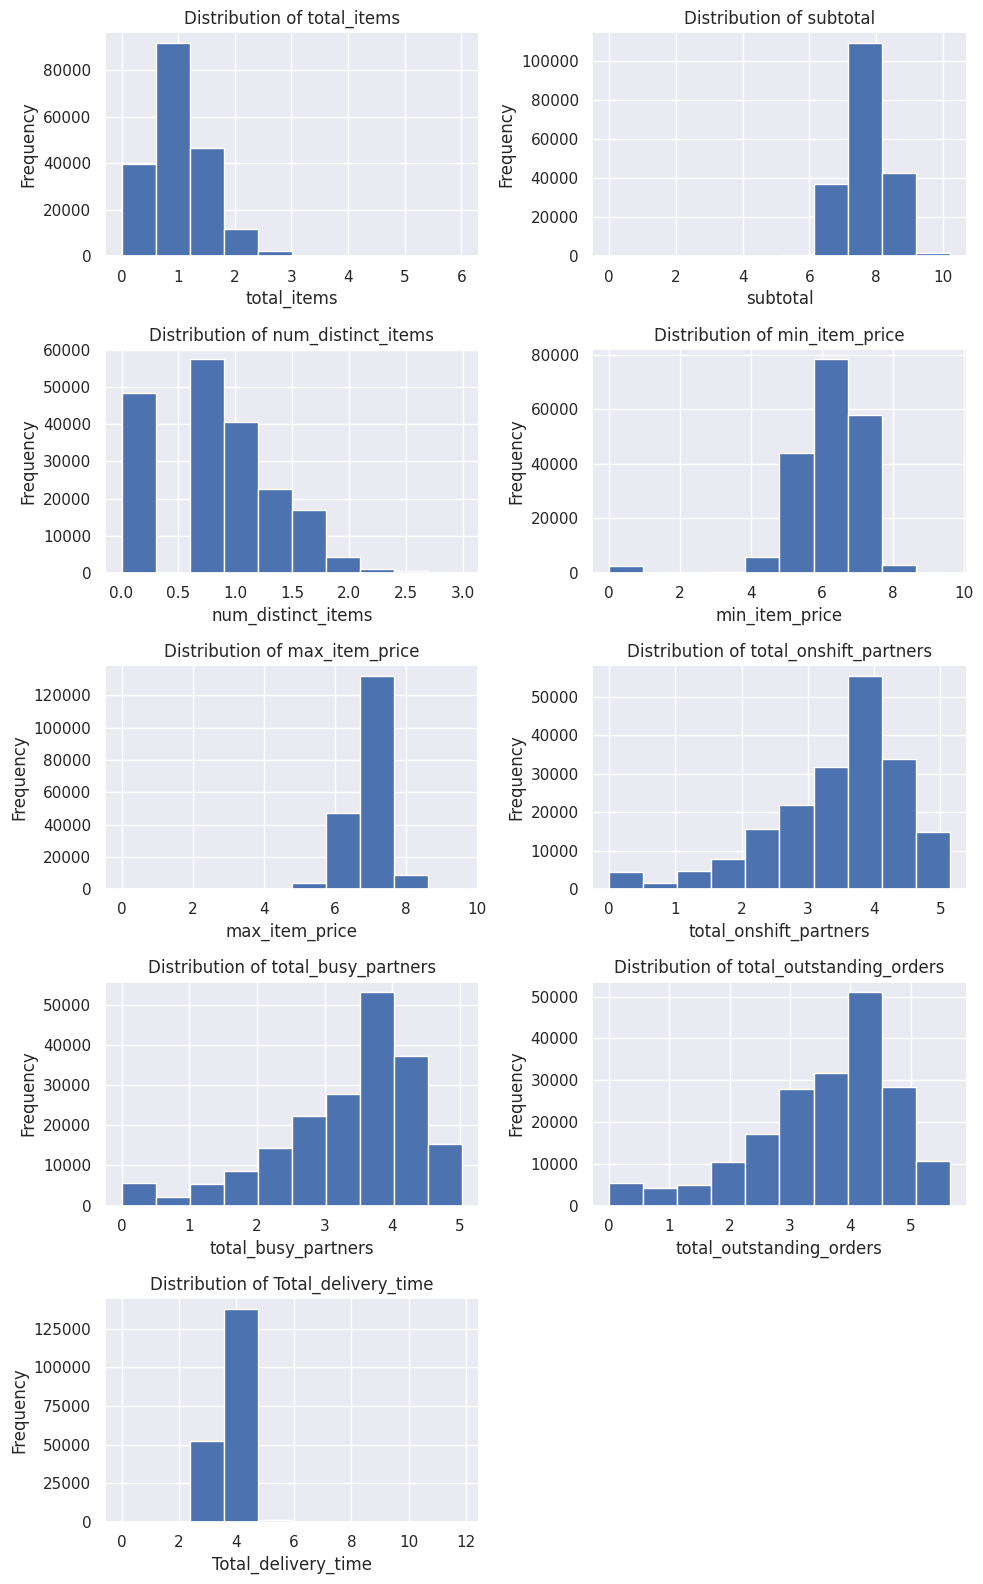

In [ ]:
# Checking the distribution of numerical columns to get an idea on how the data is distributed

plt.figure(figsize = (10, 16))

for i in range(1,len(num_cols)+1):
    rows = (len(num_cols)//2)+1
    plt.subplot(rows, 2, i)
    plt.hist(df1[num_cols[i-1]])
    plt.title(f'Distribution of {num_cols[i-1]}')
    plt.xlabel(num_cols[i-1])
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# The above plot shows almost all the features having outliers
# Checking percentage of Outliers for each field

for col in num_cols:
    q1 = np.quantile(df1[col],0.25)
    q3 = np.quantile(df1[col],0.75)
    IQR = q3-q1
    upper_wisker = q3 + (1.5 * IQR)
    lower_wisker = q1 - (1.5 * IQR)
    upper_outliers = len(df1[df1[col] > upper_wisker])
    lower_outliers = len(df1[df1[col] < lower_wisker])
    outlier_percentage = round((upper_outliers + lower_outliers)*100/len(df1),2)

    print(f'Field = {col}')
    print(f'Total Outliers Count = {upper_outliers + lower_outliers}')
    print(f'Outlier percentage = {outlier_percentage}\n')

Field = total_items
Total Outliers Count = 2487
Outlier percentage = 1.3

Field = subtotal
Total Outliers Count = 794
Outlier percentage = 0.41

Field = num_distinct_items
Total Outliers Count = 14
Outlier percentage = 0.01

Field = min_item_price
Total Outliers Count = 0
Outlier percentage = 0.0

Field = max_item_price
Total Outliers Count = 6615
Outlier percentage = 3.45

Field = total_onshift_partners
Total Outliers Count = 0
Outlier percentage = 0.0

Field = total_busy_partners
Total Outliers Count = 0
Outlier percentage = 0.0

Field = total_outstanding_orders
Total Outliers Count = 0
Outlier percentage = 0.0

Field = Total_delivery_time
Total Outliers Count = 2572
Outlier percentage = 1.34



- As seen from the above analysis we are successfull in reducing the number of outliers, however there are still few left which we will remove by dropping them with IQR method.

In [ ]:
# Dropping the Outliers

outlier_cols = ['total_items','subtotal','num_distinct_items','max_item_price','Total_delivery_time']

for col in outlier_cols:
    q1 = np.quantile(df1[col],0.25)
    q3 = np.quantile(df1[col],0.75)
    IQR = q3-q1
    upper_limit = q3 + (1.5 * IQR)
    lower_limit = q1 - (1.5 * IQR)

    df1 = df1[(df1[col] >= lower_limit) & (df1[col] <= upper_limit)]

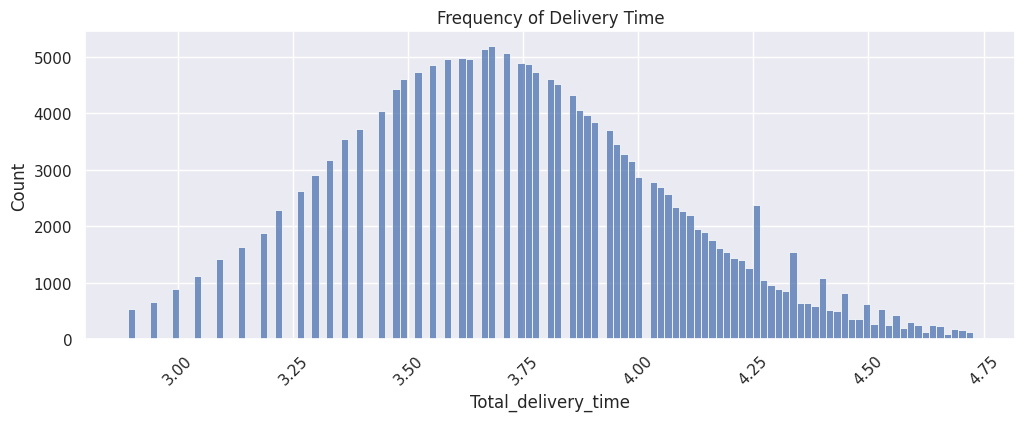

In [ ]:
# Checking distribution of target variable
plt.figure(figsize = (12,4))
sns.histplot(df1['Total_delivery_time'])
plt.xticks(rotation = 45)
plt.title('Frequency of Delivery Time')
plt.show()

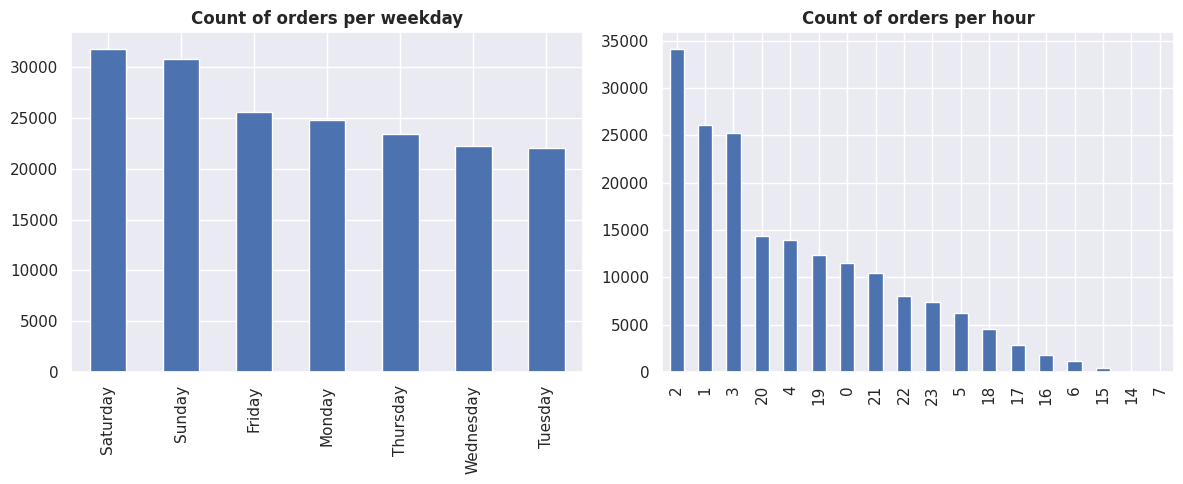

In [ ]:
# Weekday with most number of orders
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
df1['Weekday'].value_counts().plot(kind = 'bar')
plt.title('Count of orders per weekday', fontweight = 'bold')

# Max order per hour
plt.subplot(1,2,2)
df1['hour_of_day'].value_counts().plot(kind = 'bar')
plt.title('Count of orders per hour', fontweight = 'bold')

plt.tight_layout()
plt.show()

- The above plots suggest:
  - Saturdays, Sundays and Fridays are the days of week with maximum number of orders.
  - Mostly the order come around midnight, where maximum orders are seen around 1 am to 3 am.

In [ ]:
df1.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,Total_delivery_time,hour_of_day,day_of_week,day,Weekday
0,1,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,1.386294,8.143517,1.386294,6.322565,7.122060,3.496508,2.639057,3.044522,4.127134,22,4,6,Friday
1,2,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,0.000000,7.549609,0.000000,7.244228,7.244228,0.000000,0.693147,0.693147,4.204693,21,1,10,Tuesday
8,2,2015-02-16 00:11:35,2015-02-16 00:38:01,f0ade77b43923b38237db569b016ba25,indian,3.0,1.386294,8.470311,1.098612,6.709304,7.380256,2.079442,1.791759,2.890372,3.258097,0,0,16,Monday
14,1,2015-02-12 03:36:46,2015-02-12 04:14:39,ef1e491a766ce3127556063d49bc2f98,italian,1.0,0.000000,7.329750,0.000000,7.329750,7.329750,1.609438,1.791759,2.079442,3.610918,3,3,12,Thursday
15,1,2015-01-27 02:12:36,2015-01-27 03:02:24,ef1e491a766ce3127556063d49bc2f98,italian,1.0,0.693147,8.194229,0.693147,7.261927,7.693937,1.609438,1.609438,1.945910,3.891820,2,1,27,Tuesday


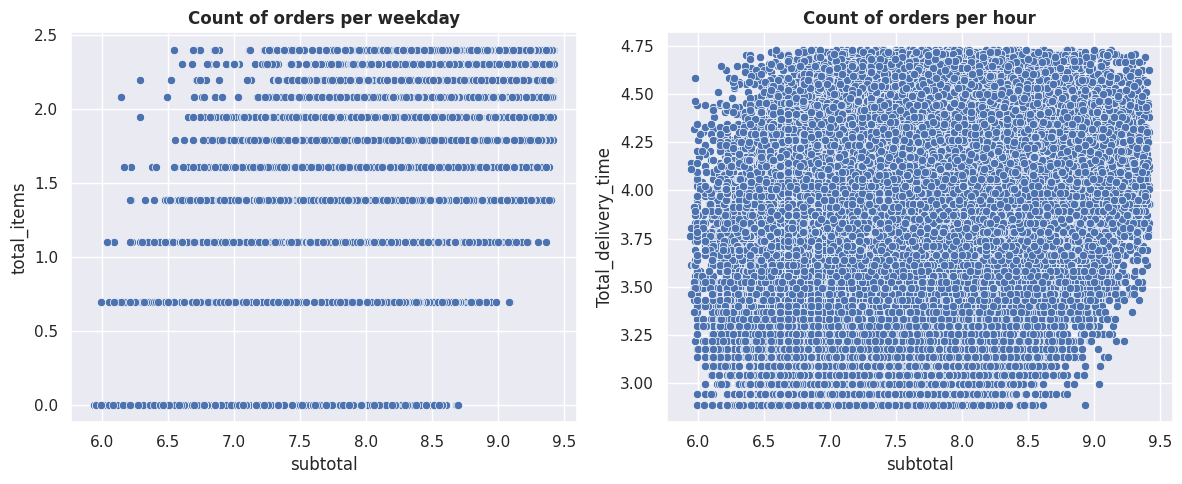

In [ ]:
# Price with respect to number of items ordered & Total delivery time

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.scatterplot(data = df1, x = 'subtotal', y = 'total_items')
plt.title('Count of orders per weekday', fontweight = 'bold')

# Max order per hour
plt.subplot(1,2,2)
sns.scatterplot(data = df1, x = 'subtotal', y = 'Total_delivery_time')
plt.title('Count of orders per hour', fontweight = 'bold')

plt.tight_layout()
plt.show()

- As seen in the above plots the price of orders does increase with increase in the number of items in a particular order. However, the delivery time isn't affected by the total price of the orders.

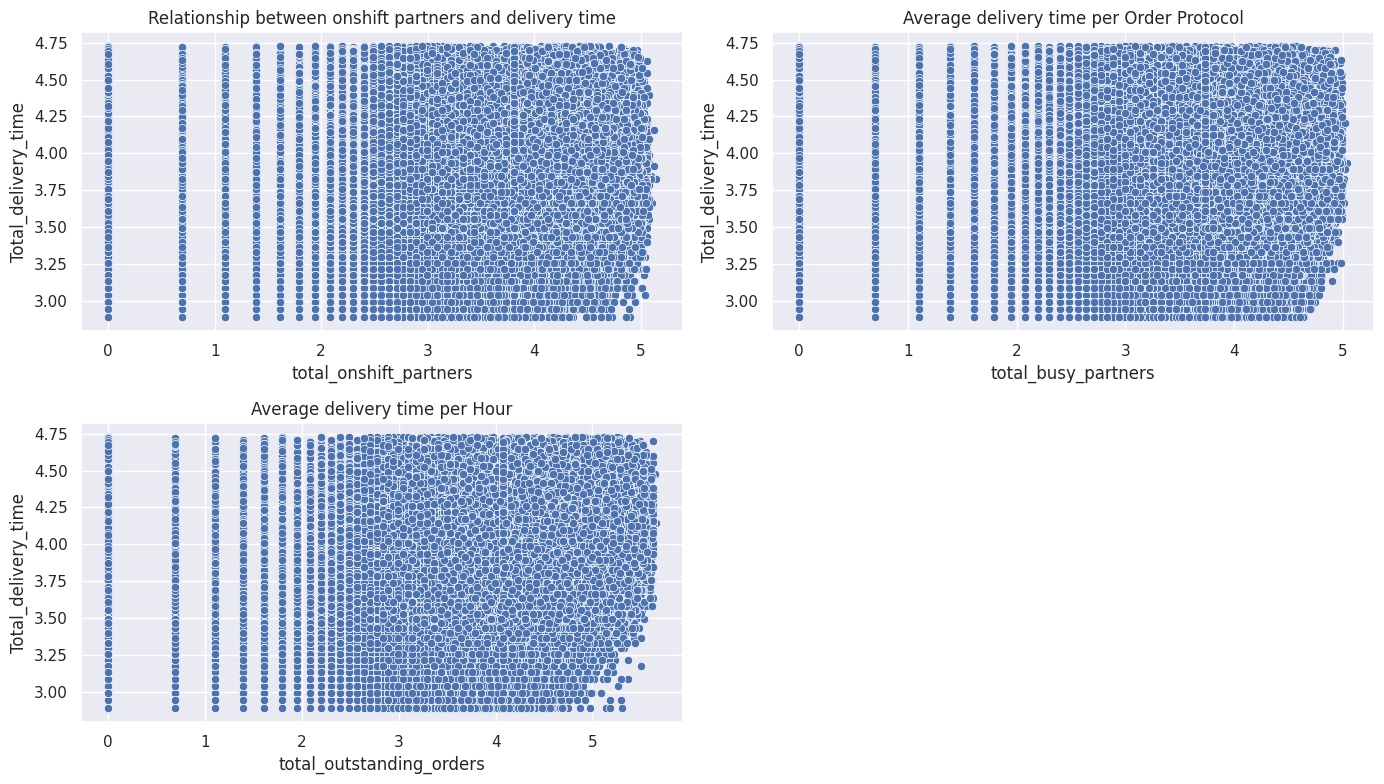

In [ ]:
# # Checking the relationship between dependemt and independent variables


plt.figure(figsize = (14,8))
plt.subplot(2,2,1)
sns.scatterplot(data = df1, x = 'total_onshift_partners', y = 'Total_delivery_time')
plt.title('Relationship between onshift partners and delivery time')

plt.subplot(2,2,2)
sns.scatterplot(data = df1, x = 'total_busy_partners', y = 'Total_delivery_time')
plt.title('Average delivery time per Order Protocol')

plt.subplot(2,2,3)
sns.scatterplot(data = df1, x = 'total_outstanding_orders', y = 'Total_delivery_time')
plt.title('Average delivery time per Hour')

plt.tight_layout()
plt.show()

- The total_onshift_partners, tota_busy_partners and the total_outstanding_orders don't have much effect on the total delivery time.

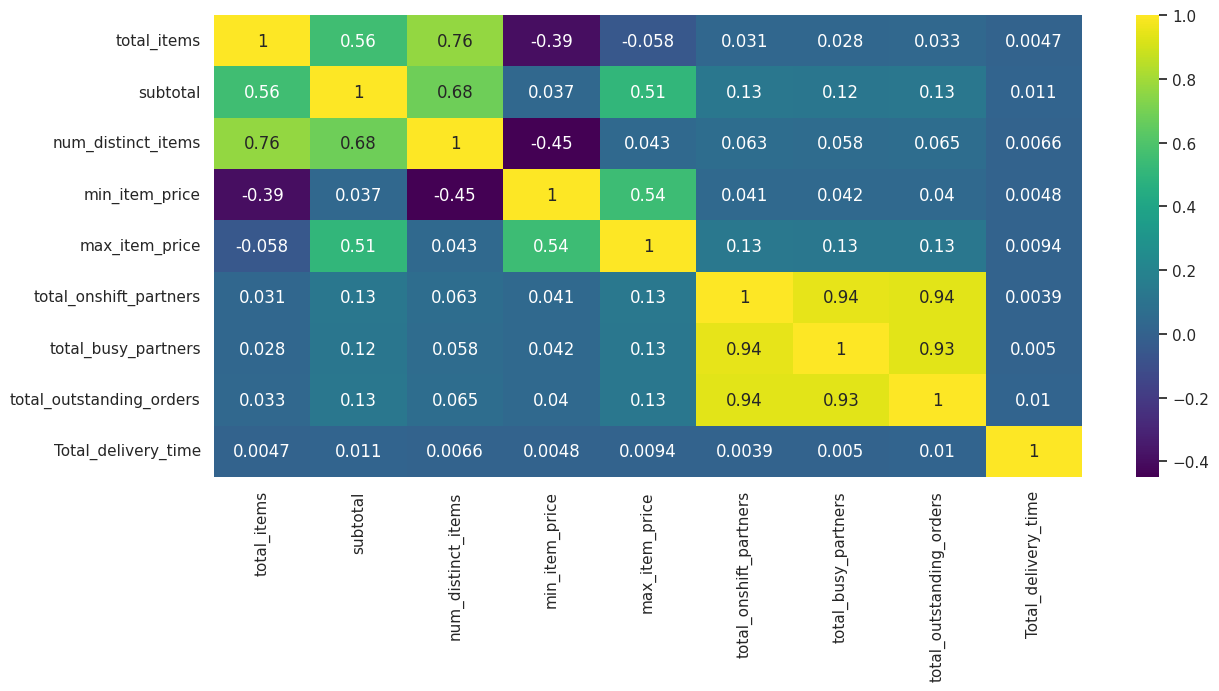

In [ ]:
# Correlation between the fields
plt.figure(figsize = (14, 6))
sns.heatmap(df[num_cols].corr(), annot = True, cmap='viridis')
plt.show()

- The above heatmap shows high positive correlation between the onshift partner, busy partners and the outstanding order fields, meaning if one increases other will also increase.
- We can also see a negative correlationship between the total items and min_item_price fields, this suggests that as number of items increases the min_item_price falls and vice versa.

## Model Building

### Data Praparation

In [ ]:
# Getting rid of columns that we don't need
cols_to_del = ['market_id', 'created_at','actual_delivery_time','store_id', 'Weekday', 'Total_delivery_time']

In [ ]:
# Dropping nulls if any
df1.dropna(axis = 0, inplace = True)

In [ ]:
# Seperating dependent and independent variables
X = df1[[x for x in df1.columns if x not in cols_to_del]]
Y = df1['Total_delivery_time']

#### One hot encoding

In [ ]:
# One hot encoding the data
x_store_cat = pd.get_dummies(X['store_primary_category'])
X = pd.concat([X, x_store_cat], axis = 1).drop('store_primary_category', axis = 1)

#### Data Splitting and Scaling

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size = 0.3, random_state = 42)

In [ ]:
# Scaling the data
scaler = StandardScaler()

# Train Data
x_cols = X_train.columns
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_train.columns = x_cols

# Test data
x_cols = X_test.columns
X_test = pd.DataFrame(scaler.transform(X_test))
X_test.columns = x_cols

### Random Forest Model

In [ ]:
# Model Building
# Creating a baseline model

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Evaluating the model

predictions = rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse**.5
print(mse)
print(rmse)

0.08774072703425344
0.2962106126293476


In [ ]:
# Hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV

grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
}

## Grid Search function
RSCV = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions = grid, cv= 3, scoring = 'mean_squared_error')
RSCV.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [200, 300, 400, 500]})

In [ ]:
# Checking the best parameters
print(RSCV.best_params_)
print(RSCV.best_score_)

{'n_estimators': 300, 'max_features': 'log2', 'max_depth': 7}
0.11987848418476825


In [ ]:
# Creating a model with best parameters

best_rf = RandomForestRegressor(n_estimators = 300, max_features = 'log2', max_depth = 7)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=7, max_features='log2', n_estimators=300)

In [ ]:
# Evaluating the best model

predictions = best_rf.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = mse**.5
print(mse)
print(rmse)

0.10415904923107693
0.32273681108772967


- The above results show that our base model performed better than the tuned model, with an MSE of 0.0877.

### Deep Lerning Model

In [ ]:
# Creating baseline model

nn_model = Sequential([
      Dense(12,activation='relu', name = 'input'),
      Dense(64,activation='relu', name = 'h1'),
      Dense(1,activation='linear', name = 'h2')]
)

# Compiling the model
nn_model.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error')

In [ ]:
# Train the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = nn_model.evaluate(X_test, y_test)

# Make predictions
predictions = nn_model.predict(X_test)

Epoch 1/10
1694/1694 [==============================] - 6s 3ms/step - loss: 0.5188 - mean_squared_error: 0.5188
Epoch 2/10
1694/1694 [==============================] - 5s 3ms/step - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 3/10
1694/1694 [==============================] - 4s 2ms/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 4/10
1694/1694 [==============================] - 3s 2ms/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 5/10
1694/1694 [==============================] - 3s 2ms/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 6/10
1694/1694 [==============================] - 3s 2ms/step - loss: 0.0995 - mean_squared_error: 0.0995
Epoch 7/10
1694/1694 [==============================] - 3s 2ms/step - loss: 0.0983 - mean_squared_error: 0.0983
Epoch 8/10
1694/1694 [==============================] - 4s 2ms/step - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 9/10
1694/1694 [==============================] - 3s 2ms/step - loss: 0.0971 - mean_squared_error:

In [ ]:
# Minimum loss
loss

[0.09791876375675201, 0.09791876375675201]

- The above baseline model gave us a loss of 0.0979, which is impressive with just 2 layers and 10 epochs.

In [ ]:
# Hyperparameter tuning
from tensorflow import keras

# Creating a model
def nn_model_tuned(learning_rate=0.01, units = 16):
    model = Sequential([
        Dense(units, activation='relu'),
        Dense(units, activation='relu'),
        Dense(units, activation='relu'),
        Dense(units, activation = 'linear')  # Output layer
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create the KerasRegressor wrapper for scikit-learn compatibility
model_hyper = keras.wrappers.scikit_learn.KerasRegressor(build_fn=nn_model_tuned, verbose=0)

# Define the hyperparameters to tune and their search ranges
param_grid = {
    'learning_rate': [0.01, 0.1, 0.001],
    'units': [32, 64, 128]
}

# Hyperparameter tuning with Random Search CV
nn_RSCV = RandomizedSearchCV(estimator=model_hyper, param_distributions=param_grid, cv=3)
nn_RSCV.fit(X_train, y_train)

# Getting best hyperparameters
best_params = nn_RSCV.best_params_
best_model = nn_RSCV.best_estimator_

# Model Performance
loss = best_model.score(X_test, y_test)

# Predictions using the best model
predictions = best_model.predict(X_test)


<ipython-input-157-d312af05c332>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_hyper = keras.wrappers.scikit_learn.KerasRegressor(build_fn=nn_model_tuned, verbose=0)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [ ]:
print(best_params)
print(loss)

{'units': 32, 'learning_rate': 0.1}
-0.11564977467060089


- Here too the base model performed better than the hyperparameter tuned model with MSE of 0.0979
- Comparing both the models we can conclude that both performed equally well but the Random Forest model came out to be the best one for this case.

# Questionnaire

**1. Defining the problem statements and where can this and modifications of this be used?**
- Proter is trying to predict the delivery time for the food orders from various parts of the city, from multiple restraurants along with multiple delivery partners.
- Their aim is to keep the business partners well informed of the delivery times to better plan their resources and help customers to better plan their meals.
  - Modifications of this model can be used in predicting any continous variables, such as
    - Predicting average price of orders
    - Predicting sales, demand forecasting, etc.

**2. List 3 functions the pandas datetime provides with one line explanation.**
- year() = Helps extract year out of date
- month() = Helps extract month out of date
- day() = Helps extract day out of date
- total_seconds() = Converts the timestamp into seconds.


**3. Short note on datetime, timedelta, time span (period)**
- datetime = It is date along with the time
- timedelta = It represents the point in time.
- time span = It is the time period between two points in time.


**4. Why do we need to check for outliers in our data?**
- Outliers represent the extreme rare ends of the data, which are very rare. And as they can have an impact on the statistical measures like mean, standard deviation, etc. and as these measures are used for decision making we need to check and remove such extreme values in order to avoid wrong interpretation from the data.


**5. Name 3 outlier removal methods?**
- IQR
- Quantile based approach
- Isolation Forest
- LOF


**6. What classical machine learning methods can we use other than random forest for regression?**
- Linear Regression
- Decision Tree
- Support Vector Regression

**7. Why is scaling required for neural networks?**
- To better generalize model towards unseen data
- For better gradient descent optimization
- Avoid dominance of any one single features because of it's larger scale

**8. Briefly explain your choice of optimizer.**
- We used the Adam optimizer as it automatically adapts the learning rate to make the convergence faster and better.

**9. Which activation function did you use and why?**
- We used the RELU activation function as it helps with minimizing the impact of the vanishing gradient problem and it's computationally efficient due to it's simple working.

**10. Why does a neural network perform well on a large dataset?**
- Neural networks automatically figure out the features needed for better results and hence benifit from the large datasets as compared to the traditional ML models which need manual feature engineering
